
# Get the data

This is a simple guide on how to download the data using [this API](https://github.com/individual-brain-charting/api). You can also find the reference for the API [here](https://individual-brain-charting.github.io/docs/ibc_api.html).


Import this tool as follows:

In [1]:
import ibc_api.utils as ibc

[siibra:INFO] Version: 0.4a61
[siibra:WARNING] This is a development release. Use at your own risk.
[siibra:INFO] Please file bugs and issues at https://github.com/FZJ-INM1-BDA/siibra-python.


Then authenticate with EBRAINS. This will return a link that takes you to EBRAINS login page and stores an access token locally.



In [2]:
ibc.authenticate()

***
To continue, please go to https://iam.ebrains.eu/auth/realms/hbp/device?user_code=USBN-YMBC
***
ebrains token successfuly set.


To see what is available for a given data type on IBC, we need fetch the file that contains that information.
The following loads a CSV file with all that info as a pandas dataframe and
saves it as ``ibc_data/available_{data_type}.csv``.

Let's do that for IBC volumetric contrast maps.



In [3]:
db = ibc.get_info(data_type="volume_maps")

[siibra:INFO] 139625 objects found for dataset ad04f919-7dcc-48d9-864a-d7b62af3d49d returned.


Let's see what's in the database



In [4]:
db

,modality,image_type,map_type,study,task,analysis_level,number_of_subjects,tags,cognitive_paradigm_cogatlas,cognitive_paradigm_description_url,contrast_definition,path,subject
0,fMRI-BOLD,volume_maps,Z,IBC,ArchiStandard,S,1,"visual_sentence_comprehension,response_selecti...",trm_5873cd1c9d4c4,http://www.cognitiveatlas.org/task/id/trm_5873...,left hand button presses upon video instructions,sub-01_ses-00_task-ArchiStandard_dir-ap_space-...,sub-01
1,fMRI-BOLD,volume_maps,Z,IBC,ArchiStandard,S,1,"visual_sentence_comprehension,response_selecti...",trm_5873cd1c9d4c4,http://www.cognitiveatlas.org/task/id/trm_5873...,left hand button presses upon video instructions,sub-01_ses-00_task-ArchiStandard_dir-ffx_space...,sub-01
2,fMRI-BOLD,volume_maps,Z,IBC,ArchiStandard,S,1,"visual_sentence_comprehension,response_selecti...",trm_5873cd1c9d4c4,http://www.cognitiveatlas.org/task/id/trm_5873...,left hand button presses upon video instructions,sub-01_ses-00_task-ArchiStandard_dir-pa_space-...,sub-01
3,fMRI-BOLD,volume_maps,Z,IBC,ArchiStandard,S,1,"visual_sentence_comprehension,response_selecti...",trm_5873cd1c9d4c4,http://www.cognitiveatlas.org/task/id/trm_5873...,left hand button presses upon video instructions,sub-01_ses-07_task-ArchiStandard_dir-ap_space-...,sub-01
4,fMRI-BOLD,volume_maps,Z,IBC,ArchiStandard,S,1,"visual_sentence_comprehension,response_selecti...",trm_5873cd1c9d4c4,http://www.cognitiveatlas.org/task/id/trm_5873...,left hand button presses upon video instructions,sub-01_ses-07_task-ArchiStandard_dir-ffx_space...,sub-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26568,fMRI-BOLD,volume_maps,Z,IBC,RewProc,S,1,"reward_valuation,reward_processing",trm_550b5c1a7f4db,http://www.cognitiveatlas.org/task/id/trm_550b...,gained vs lost 20 or 10 units of reward,sub-15_ses-39_task-RewProc_dir-unknown_space-M...,sub-15
26569,fMRI-BOLD,volume_maps,Z,IBC,RewProc,S,1,"reward_valuation,reward_processing",trm_550b5c1a7f4db,http://www.cognitiveatlas.org/task/id/trm_550b...,gained vs lost 20 or 10 units of reward,sub-15_ses-39_task-RewProc_dir-unknown_space-M...,sub-15
26570,fMRI-BOLD,volume_maps,Z,IBC,RewProc,S,1,"risk_aversion,risk_processing,loss_aversion",trm_550b5c1a7f4db,http://www.cognitiveatlas.org/task/id/trm_550b...,lost vs gained 20 or 10 units of reward,sub-15_ses-39_task-RewProc_dir-ffx_space-MNI15...,sub-15
26571,fMRI-BOLD,volume_maps,Z,IBC,RewProc,S,1,"risk_aversion,risk_processing,loss_aversion",trm_550b5c1a7f4db,http://www.cognitiveatlas.org/task/id/trm_550b...,lost vs gained 20 or 10 units of reward,sub-15_ses-39_task-RewProc_dir-unknown_space-M...,sub-15


There are over 26000 statistic maps available for download.
But since it's a pandas dataframe, we can filter it to get just what we want.
Let's see how many statistic maps are available for each task.



In [5]:
db["task"].value_counts()

Audio                  2926
MathLanguage           2880
ArchiStandard          1794
RSVPLanguage           1729
MTTNS                   912
MTTWE                   912
Audi                    900
SpatialNavigation       864
ArchiSocial             702
Self                    660
Visu                    576
BiologicalMotion1       550
BiologicalMotion2       550
VSTMC                   550
HcpWm                   546
ArchiEmotional          546
ArchiSpatial            546
RewProc                 459
FaceBody                450
HcpMotor                429
MVEB                    396
DotPatterns             363
NARPS                   360
WardAndAllport          330
Scene                   330
TwoByTwo                330
Attention               330
EmoReco                 330
MCSE                    324
Moto                    324
SelectiveStopSignal     264
StopNogo                231
Lec1                    216
MVIS                    216
EmoMem                  198
VSTM                

You can find the descriptions of all these tasks [here](https://individual-brain-charting.github.io/docs/tasks.html).



For this example, let's just download the maps from Discount task, only for sub-08. You can filter the maps for tasks and subjects like this.


In [6]:
filtered_db = ibc.filter_data(db, task_list=["Discount"], subject_list=["sub-08"])
filtered_db

,modality,image_type,map_type,study,task,analysis_level,number_of_subjects,tags,cognitive_paradigm_cogatlas,cognitive_paradigm_description_url,contrast_definition,path,subject
12500,fMRI-BOLD,volume_maps,Z,IBC,Discount,S,1,"response_conflict,selective_control",trm_566748c929afc,http://www.cognitiveatlas.org/task/id/trm_5667...,effect of delay on reward,sub-08_ses-27_task-Discount_dir-ap_space-MNI15...,sub-08
12501,fMRI-BOLD,volume_maps,Z,IBC,Discount,S,1,"response_conflict,selective_control",trm_566748c929afc,http://www.cognitiveatlas.org/task/id/trm_5667...,effect of delay on reward,sub-08_ses-27_task-Discount_dir-ffx_space-MNI1...,sub-08
12502,fMRI-BOLD,volume_maps,Z,IBC,Discount,S,1,"response_conflict,selective_control",trm_566748c929afc,http://www.cognitiveatlas.org/task/id/trm_5667...,effect of delay on reward,sub-08_ses-27_task-Discount_dir-pa_space-MNI15...,sub-08
12503,fMRI-BOLD,volume_maps,Z,IBC,Discount,S,1,"incentive_salience,selective_control",trm_566748c929afc,http://www.cognitiveatlas.org/task/id/trm_5667...,effect of reward gain,sub-08_ses-27_task-Discount_dir-ap_space-MNI15...,sub-08
12504,fMRI-BOLD,volume_maps,Z,IBC,Discount,S,1,"incentive_salience,selective_control",trm_566748c929afc,http://www.cognitiveatlas.org/task/id/trm_5667...,effect of reward gain,sub-08_ses-27_task-Discount_dir-ffx_space-MNI1...,sub-08
12505,fMRI-BOLD,volume_maps,Z,IBC,Discount,S,1,"incentive_salience,selective_control",trm_566748c929afc,http://www.cognitiveatlas.org/task/id/trm_5667...,effect of reward gain,sub-08_ses-27_task-Discount_dir-pa_space-MNI15...,sub-08


Now we are ready to download the few selected maps that we filtered.

The following will save the requested maps under
``ibc_data/resulting_smooth_maps/sub-08/task-Discount`` 
(or whatever subject you chose). And will also create a local CSV file ``ibc_data/downloaded_volume_maps.csv`` to track the downloaded files. This will contain local file paths and the time they were downloaded at, and is updated everytime you download new files.


In [7]:
downloaded_db = ibc.download_data(filtered_db, organise_by='task')
downloaded_db

[siibra:INFO] 139625 objects found for dataset ad04f919-7dcc-48d9-864a-d7b62af3d49d returned.
100%|███████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.65it/s]


Downloaded requested files from IBC volume_maps dataset. See ibc_data/downloaded_volume_maps.csv for details.


,local_path,downloaded_on
0,ibc_data/resulting_smooth_maps/sub-08/task-Dis...,2023-07-25 18:23:01.270473
1,ibc_data/resulting_smooth_maps/sub-08/task-Dis...,2023-07-25 18:23:01.439383
2,ibc_data/resulting_smooth_maps/sub-08/task-Dis...,2023-07-25 18:23:01.611974
3,ibc_data/resulting_smooth_maps/sub-08/task-Dis...,2023-07-25 18:23:01.801682
4,ibc_data/resulting_smooth_maps/sub-08/task-Dis...,2023-07-25 18:23:01.982841
5,ibc_data/resulting_smooth_maps/sub-08/task-Dis...,2023-07-25 18:23:02.156350


Let's try plotting one of these contrast maps

/home/himanshu/Desktop/ibc_analysis/ibcpy/lib/python3.8/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


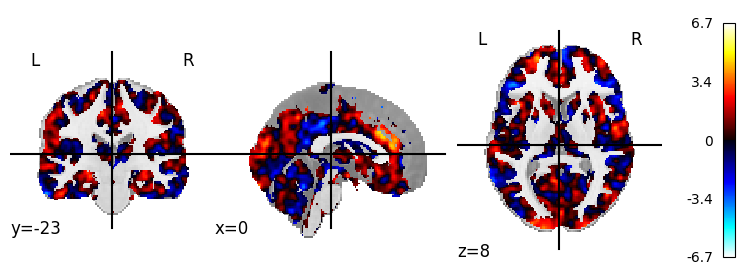

In [8]:
from nilearn.plotting import plot_stat_map

map_path = downloaded_db["local_path"][0]
plot_stat_map(map_path)